In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [2]:
# get mean of each column rounded to 1 decimal places
means = df.mean().round(1)
means.to_csv('means.csv')
means['Player'] = 'Average'
totalg = len(df.index)
means['TotalGames'] = totalg
means = means.to_frame()
avgs = means.T
avgs = avgs.set_index('Player')


C:\Users\greyl\AppData\Local\Temp\ipykernel_66008\2421343157.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean().round(1)


In [3]:
# get player averages
players = df['Player'].unique()
for p in players:
    # get rows for player
    player_rows = df[df['Player'] == p]
    # get average for player
    player_avg = player_rows.mean().round(1)
    # save average to csv
    player_dict = player_avg.to_frame()

    new_row_df = pd.DataFrame(player_dict).T
    new_row_df['Player'] = p
    new_row_df['TotalGames'] = len(player_rows.index)
    new_row_df = new_row_df.set_index('Player')

    # Concatenate the original DataFrame with the new row DataFrame
    avgs = pd.concat([avgs, new_row_df])



C:\Users\greyl\AppData\Local\Temp\ipykernel_66008\3057852076.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  player_avg = player_rows.mean().round(1)
C:\Users\greyl\AppData\Local\Temp\ipykernel_66008\3057852076.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  player_avg = player_rows.mean().round(1)
C:\Users\greyl\AppData\Local\Temp\ipykernel_66008\3057852076.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  player_avg = player_rows.mean().round(1)
C:\Users\greyl\AppData\Local

In [4]:
# get top player for each column
for c in df.columns:
    if c in ['Date', 'Player']: continue
    # get max row for column value
    m = df[c].idxmax()
    print(c, df.iloc[m]['Player'], df.iloc[m][c])
    # print(df.iloc[m]['Player'], df.iloc[m][c])


Ones Clare 5
Twos Laura 10
Threes Charles 15
Fours Simon 20
Fives Vi 25
Sixes Clare 24
3OfKind Simon 28
4OfKind Charles 29
FullHouse Clare 25
SmallStraight Clare 30
LargeStraight Clare 40
Yahtzee Grey 50
Chance Charles 27
YahtzeeBonus Vi 200
UserScore Vi 431
TopTotal Simon 110
BottomTotal Vi 378
Score_Total Vi 431
Score_Error Hannah 36


In [5]:
# Create an ExcelWriter object
writer = pd.ExcelWriter('Liedtzee.xlsx')

# Write each DataFrame to a separate sheet
df.to_excel(writer, sheet_name='Data')
avgs.to_excel(writer, sheet_name='Players')

# Save the Excel file
writer.save()
writer.close()

c:\Users\greyl\PyExplore\virtual_env\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


Text(0.5, 0.98, 'Normalized Top Section Scores')

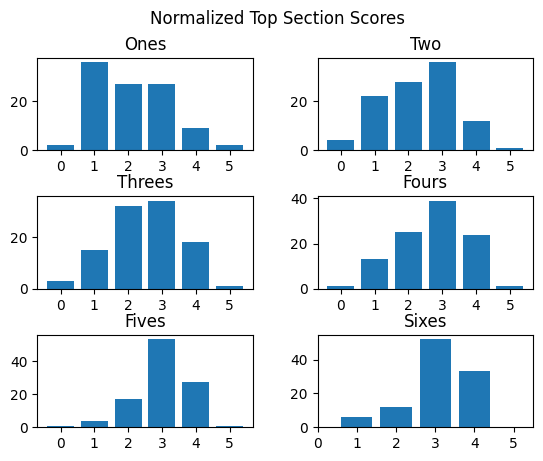

In [32]:

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(3, 2)
# FILEPATH: /c:/Users/greyl/PyExplore/SubProjects/Yahtzee/yat.ipynb
ax[0,0].bar(df['Ones'].value_counts().index, df['Ones'].value_counts().values)
ax[0, 0].xaxis.set_major_locator(MultipleLocator(base=1))  # Set x-axis ticks as multiples of twos

df['Two'] = df['Twos']/2
ax[0,1].bar(df['Two'].value_counts().index, df['Two'].value_counts().values)
ax[0, 1].xaxis.set_major_locator(MultipleLocator(base=1))  # Set x-axis ticks as multiples of twos

df['Three'] = df['Threes']/3
ax[1,0].bar(df['Three'].value_counts().index, df['Three'].value_counts().values)
ax[1, 0].xaxis.set_major_locator(MultipleLocator(base=1))  # Set x-axis ticks as multiples of twos

df['Four'] = df['Fours']/4
ax[1,1].bar(df['Four'].value_counts().index, df['Four'].value_counts().values)
ax[1, 1].xaxis.set_major_locator(MultipleLocator(base=1))  # Set x-axis ticks as multiples of twos

df['Five'] = df['Fives']/5
ax[2,0].bar(df['Five'].value_counts().index, df['Five'].value_counts().values)
ax[2, 0].xaxis.set_major_locator(MultipleLocator(base=1))  # Set x-axis ticks as multiples of twos

df['Six'] = df['Sixes']/6
ax[2,1].bar(df['Six'].value_counts().index, df['Six'].value_counts().values)
ax[2, 1].xaxis.set_major_locator(MultipleLocator(base=1))  # Set x-axis ticks as multiples of twos
# set xlim to 0-5
ax[2,1].set_xlim(0,5.5)

fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0,0].set_title('Ones')
ax[0,1].set_title('Two')
ax[1,0].set_title('Threes')
ax[1,1].set_title('Fours')
ax[2,0].set_title('Fives')
ax[2,1].set_title('Sixes')
# set fig title
fig.suptitle('Normalized Top Section Scores')



Text(0.5, 0.98, 'Bottom Section Score Distribution')

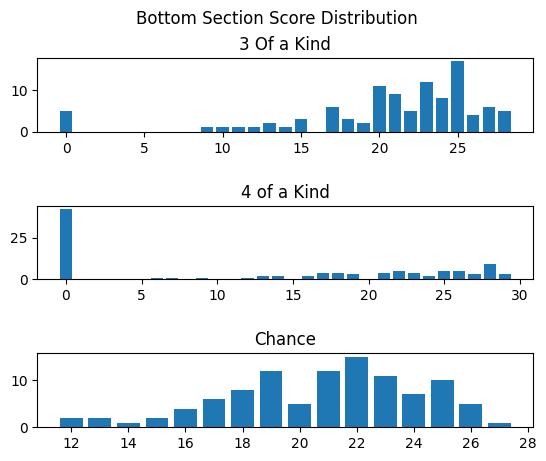

In [43]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1)
# FILEPATH: /c:/Users/greyl/PyExplore/SubProjects/Yahtzee/yat.ipynb
ax[0].bar(df['3OfKind'].value_counts().index, df['3OfKind'].value_counts().values)
ax[1].bar(df['4OfKind'].value_counts().index, df['4OfKind'].value_counts().values)
ax[2].bar(df['Chance'].value_counts().index, df['Chance'].value_counts().values)

fig.subplots_adjust(hspace=1, wspace=0.3)

ax[0].set_title('3 Of a Kind')
ax[1].set_title('4 of a Kind')
ax[2].set_title('Chance')
# set fig title
fig.suptitle('Bottom Section Score Distribution')



TypeError: Column '3OfKind' has dtype object, cannot use method 'nlargest' with this dtype

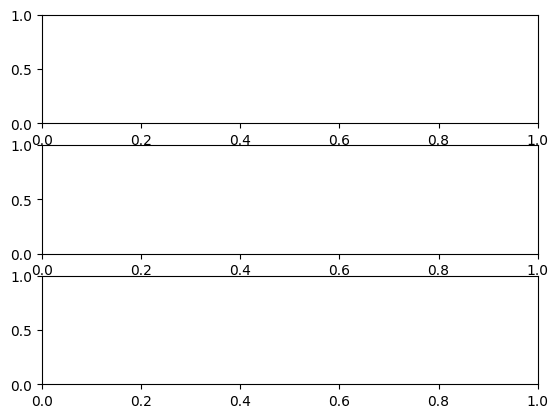

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1)

top_3_avgs = avgs.nlargest(3, '3OfKind')

# FILEPATH: /c:/Users/greyl/PyExplore/SubProjects/Yahtzee/yat.ipynb
ax[0].bar(top_3_avgs['3OfKind'], top_3_avgs['3OfKind'])

fig.subplots_adjust(hspace=1, wspace=0.3)

ax[0].set_title('3 Of a Kind')
ax[1].set_title('4 of a Kind')
ax[2].set_title('Chance')
# set fig title
fig.suptitle('Bottom Section Score Distribution')